import numpy as np
import glob, os, sys
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy import interpolate
import seaborn as sns
from scipy import stats

from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_family('serif')
font.set_size('large')

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [115]:
hdu = fits.open('/Users/parkerf/Research/SkyModel/BOSS_Sky/Analysis/FiberLocation/files/line_flux_files/complete_line_flux_file.fits')
data = hdu[1].data

In [4]:
dark_data = data[(data['AIRMASS'] < 1.4) &(data['SUN_ALT'] < -18) & (data['MOON_ALT'] < -18) & (data['GAL_LAT'] > 10)]

In [41]:
blue_dark = dark_data[(dark_data['CAMERAS'] == 'b1') | (dark_data['CAMERAS'] == 'b2')]
red_dark = dark_data[(dark_data['CAMERAS'] == 'r1') | (dark_data['CAMERAS'] == 'r2')]

In [5]:
dark_data.dtype.names

('PLATE',
 'SPECNO',
 'IMG',
 'FIB',
 'XFOCAL_x',
 'YFOCAL_x',
 'FIBER_RA',
 'FIBER_DEC',
 'MJD',
 'TAI-BEG',
 'TAI-END',
 'RA',
 'DEC',
 'CAMERAS',
 'AIRMASS',
 'ALT',
 'AZ',
 'EXPTIME',
 'SEEING20',
 'SEEING50',
 'SEEING80',
 'AIRTEMP',
 'DEWPOINT',
 'DUSTA',
 'DUSTB',
 'WINDD25M',
 'WINDS25M',
 'GUSTD',
 'GUSTS',
 'HUMIDITY',
 'PRESSURE',
 'WINDD',
 'WINDS',
 'MOON_LAT',
 'MOON_LON',
 'SUN_LAT',
 'SUN_LON',
 'MOON_ALT',
 'MOON_AZ',
 'SUN_ALT',
 'SUN_AZ',
 'MOON_D',
 'MOON_SEP',
 'SUN_MOON_SEP',
 'SUN_ELONG',
 'DAYS2FULL',
 'ECL_LAT',
 'ECL_LON',
 'GAL_LAT',
 'GAL_LON',
 'AZ_CALC',
 'FLI',
 'SEASON',
 'HOUR',
 'SOLARFLUX',
 'QUALITY',
 'XFOCAL_y',
 'YFOCAL_y',
 'THROUGHPUT',
 'HgId',
 'OH4',
 'OH6',
 'A',
 'HgIb',
 'B',
 'Hg',
 'HgIa',
 'OI',
 'x',
 'mean_A',
 'mean_OH4',
 'mean_B',
 'mean_OH6',
 'mean_HgIb',
 'mean_HgIa',
 'mean_Hg',
 'mean_HgId',
 'mean_OI',
 'rA',
 'rC',
 'bD',
 'bA',
 'rD',
 'rE',
 'bC',
 'bB',
 'rB',
 'bE',
 'mean_rA',
 'mean_rB',
 'mean_bB',
 'mean_rE',
 'mean_

(array([  18570.,   34292.,   39454.,   55140.,   68356.,   90362.,
         123216.,  141246.,  115954.,  101982.]),
 array([-82.88725281, -76.39861927, -69.90998573, -63.4213522 ,
        -56.93271866, -50.44408512, -43.95545158, -37.46681805,
        -30.97818451, -24.48955097, -18.00091743]),
 <a list of 10 Patch objects>)

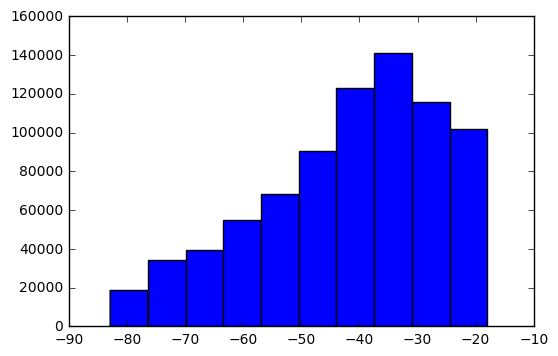

In [116]:
plt.hist(data['MOON_ALT'])

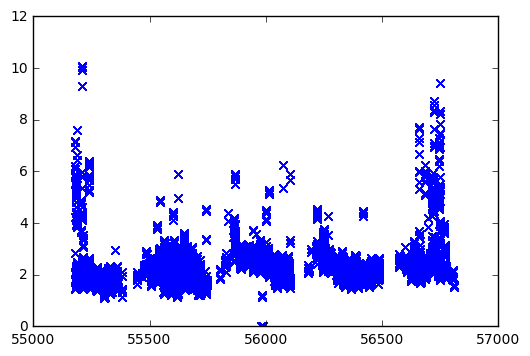

In [45]:
plt.plot(blue_dark['MJD'], blue_dark['mean_bC'],'x')

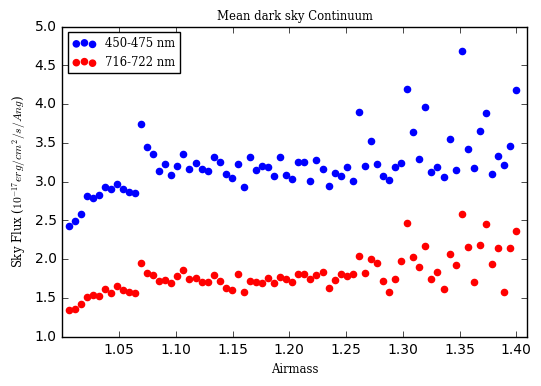

In [52]:
means1, edges1, numbers1 = stats.binned_statistic(blue_dark['AIRMASS'], blue_dark['mean_bB'], statistic = 'mean', bins = 75)
means2, edges2, numbers2 = stats.binned_statistic(red_dark['AIRMASS'], red_dark['mean_rB'], statistic = 'mean', bins = 75)
plt.scatter(edges1[1:], means1, label = '450-475 nm', color = 'b')
plt.scatter(edges2[1:], means2, label = '716-722 nm', color = 'r')
plt.xlim(edges[0], edges[-1]+.01)
plt.xlabel("Airmass", fontproperties = font)
plt.ylabel("Sky Flux ($10^{-17} erg/cm^{2}/s/Ang$)", fontproperties = font)
plt.title("Mean dark sky Continuum", fontproperties = font)
plt.legend(loc = 'upper left', prop = font)

In [55]:
DATA_DIR = '/Volumes/PFagrelius_Backup/sky_data/sky_flux/'
spframe_files = glob.glob(DATA_DIR+'*_calibrated_sky.npy')

In [69]:
plates = np.random.choice(np.unique(blue_dark['PLATE']),2)

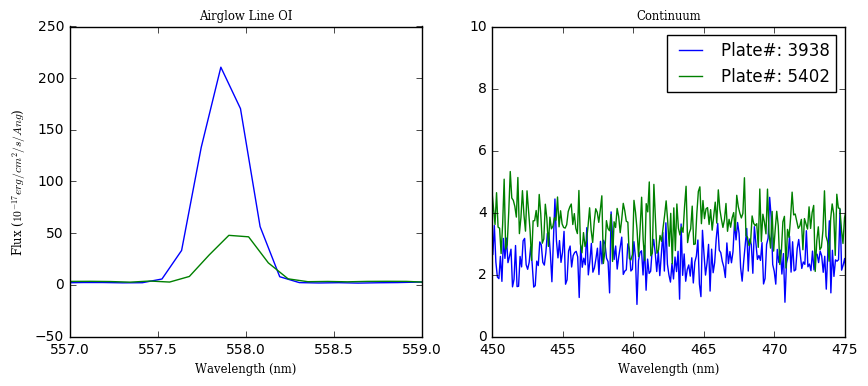

In [97]:

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,4))
for plate in plates:
    meta = np.random.choice(blue_dark[blue_dark['PLATE'] == plate],1)
    data = np.load(DATA_DIR+'/%s_calibrated_sky.npy' % str(plate))
    this_data = data[meta[0]['SPECNO']]
    ax1.plot(this_data['WAVE'], this_data['SKY'], label = "Plate#: %d"%plate)
    ax2.plot(this_data['WAVE'], this_data['SKY'], label = "Plate#: %d"%plate)
ax1.set_ylabel('Flux ($10^{-17} erg/cm^{2}/s/Ang$)', fontproperties = font)
ax1.set_xlabel('Wavelength (nm)', fontproperties = font)
ax2.set_xlabel('Wavelength (nm)', fontproperties = font)
ax1.set_xlim(557,559)
ax2.set_xlim(450,475)
ax2.set_ylim(0,10)
ax1.set_title("Airglow Line OI", fontproperties = font)
ax2.set_title("Continuum", fontproperties = font)
plt.legend()

In [110]:
from matplotlib.pyplot import cm
color=iter(cm.rainbow(np.linspace(0,1,4)))

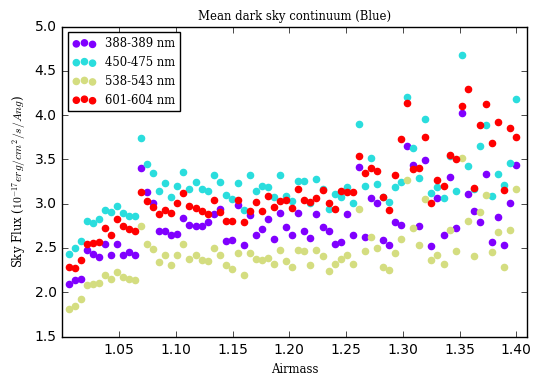

In [111]:
means1, edges1, numbers1 = stats.binned_statistic(blue_dark['AIRMASS'], blue_dark['mean_bB'], statistic = 'mean', bins = 75)
means2, edges2, numbers2 = stats.binned_statistic(blue_dark['AIRMASS'], blue_dark['mean_bC'], statistic = 'mean', bins = 75)
means3, edges3, numbers3 = stats.binned_statistic(blue_dark['AIRMASS'], blue_dark['mean_bD'], statistic = 'mean', bins = 75)
means4, edges4, numbers3 = stats.binned_statistic(blue_dark['AIRMASS'], blue_dark['mean_bA'], statistic = 'mean', bins = 75)
means5, edges5, numbers3 = stats.binned_statistic(blue_dark['AIRMASS'], blue_dark['mean_bE'], statistic = 'mean', bins = 75)
plt.scatter(edges4[1:], means4, label = '388-389 nm', color = next(color))
plt.scatter(edges1[1:], means1, label = '450-475 nm', color = next(color))
plt.scatter(edges2[1:], means2, label = '538-543 nm',color = next(color))
plt.scatter(edges3[1:], means3, label = '601-604 nm',color = next(color))
plt.xlim(edges[0], edges[-1]+.01)
plt.xlabel("Airmass", fontproperties = font)
plt.ylabel("Sky Flux ($10^{-17} erg/cm^{2}/s/Ang$)", fontproperties = font)
plt.title("Mean dark sky continuum (Blue)", fontproperties = font)
plt.legend(loc = 'upper left', prop = font)

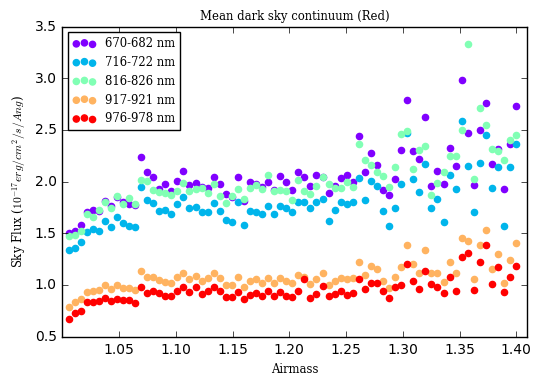

In [113]:
color=iter(cm.rainbow(np.linspace(0,1,5)))
means1, edges1, numbers1 = stats.binned_statistic(red_dark['AIRMASS'], red_dark['mean_rA'], statistic = 'mean', bins = 75)
means2, edges2, numbers2 = stats.binned_statistic(red_dark['AIRMASS'], red_dark['mean_rB'], statistic = 'mean', bins = 75)
means3, edges3, numbers3 = stats.binned_statistic(red_dark['AIRMASS'], red_dark['mean_rC'], statistic = 'mean', bins = 75)
means4, edges4, numbers3 = stats.binned_statistic(red_dark['AIRMASS'], red_dark['mean_rD'], statistic = 'mean', bins = 75)
means5, edges5, numbers3 = stats.binned_statistic(red_dark['AIRMASS'], red_dark['mean_rE'], statistic = 'mean', bins = 75)

plt.scatter(edges1[1:], means1, label = '670-682 nm', color = next(color))
plt.scatter(edges2[1:], means2, label = '716-722 nm',color = next(color))
plt.scatter(edges3[1:], means3, label = '816-826 nm',color = next(color))
plt.scatter(edges4[1:], means4, label = '917-921 nm', color = next(color))
plt.scatter(edges5[1:], means5, label = '976-978 nm',color = next(color))
plt.xlim(edges[0], edges[-1]+.01)
plt.xlabel("Airmass", fontproperties = font)
plt.ylabel("Sky Flux ($10^{-17} erg/cm^{2}/s/Ang$)", fontproperties = font)
plt.title("Mean dark sky continuum (Red)", fontproperties = font)
plt.legend(loc = 'upper left', prop = font)

In [3]:
FILE_DIR = '/Users/parkerf/Research/SkyModel/SkyModelling/BGS_files/'
filen = FILE_DIR + 'boss_cont_data.fits'

In [4]:
hdu = fits.open(filen)
data = hdu[1].data

In [5]:
D = data[np.isfinite(data['DUSTB'])]

In [6]:
np.unique(D['DUSTB'])

array([ -1.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
         7.85400000e+03,   8.36200000e+03,   8.37800000e+03])

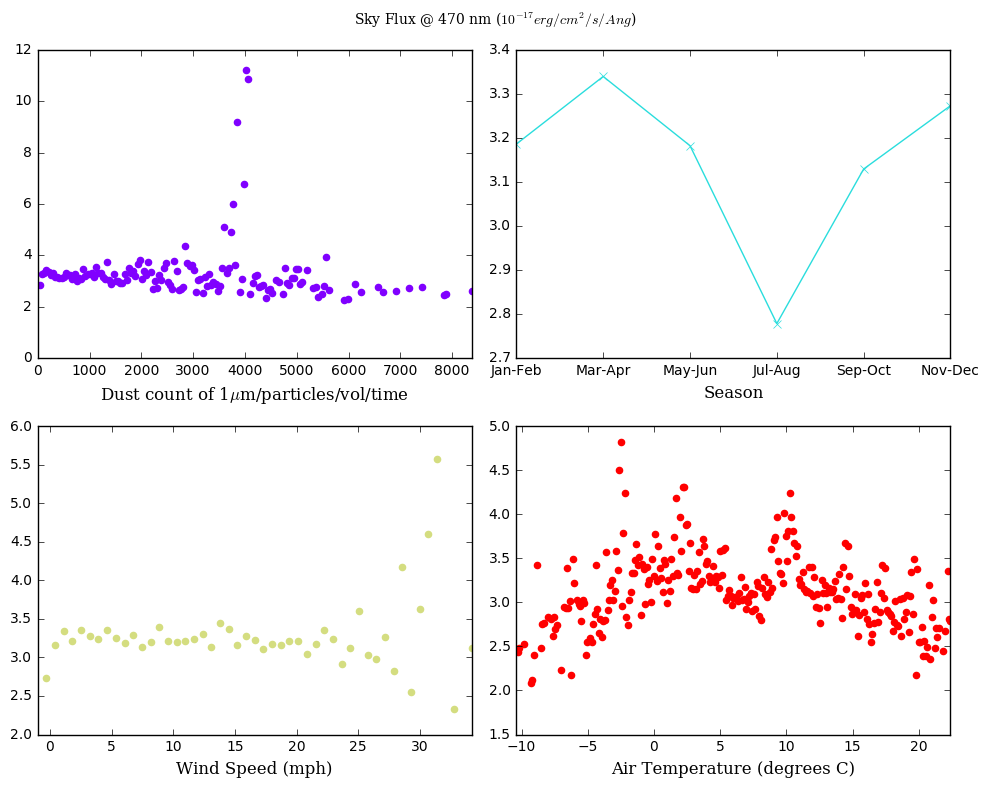

In [61]:
color=iter(cm.rainbow(np.linspace(0,1,4)))
fig, axarr = plt.subplots(2,2,figsize=(10,8))
ax = axarr.ravel()
means, edges, numbers = stats.binned_statistic(D['DUSTB'], D['SKY_VALUE'], statistic = 'mean', bins = 200)
ax[0].scatter(edges[1:], means,color = next(color))
ax[0].set_xlim(edges[0], edges[-1])
ax[0].set_xlabel("Dust count of 1$\mu$m/particles/vol/time", fontproperties = font)
#ax1.ylabel(

means, edges, numbers = stats.binned_statistic(D['SEASON'], D['SKY_VALUE'], statistic = 'mean', bins = 6)
ax[1].plot(edges[1:], means,'-x',color = next(color))
labels = ('Jan-Feb','Mar-Apr','May-Jun', 'Jul-Aug','Sep-Oct','Nov-Dec')
ax[1].set_xticklabels(labels)#, rotation='vertical')
ax[1].set_xlabel("Season", fontproperties = font)

means, edges, numbers = stats.binned_statistic(D['WINDS'], D['SKY_VALUE'], statistic = 'mean', bins = 50)
ax[2].scatter(edges[1:], means,color = next(color))
ax[2].set_xlim(edges[0], edges[-1])
ax[2].set_xlabel("Wind Speed (mph)", fontproperties = font)

means, edges, numbers = stats.binned_statistic(data['AIRTEMP'], data['SKY_VALUE'], statistic = 'mean', bins = 300)
ax[3].scatter(edges[1:], means,color=next(color))
ax[3].set_xlim(edges[0], edges[-1])
ax[3].set_xlabel("Air Temperature (degrees C)", fontproperties = font)

plt.suptitle("Sky Flux @ 470 nm ($10^{-17} erg/cm^{2}/s/Ang$)", fontproperties = font)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

/Users/parkerf/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


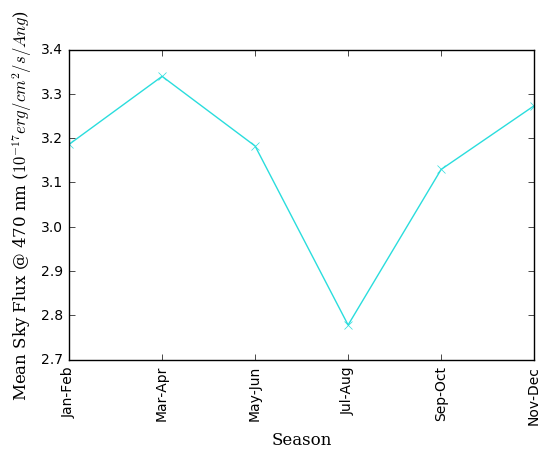

/Users/parkerf/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


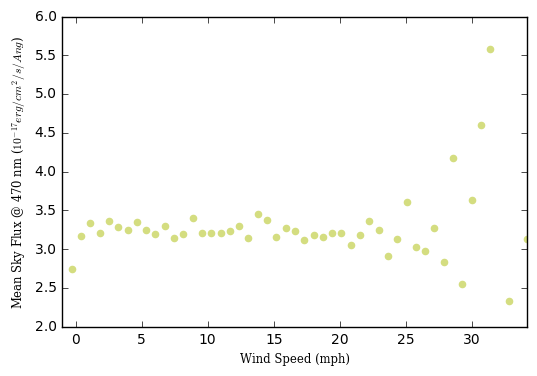

/Users/parkerf/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


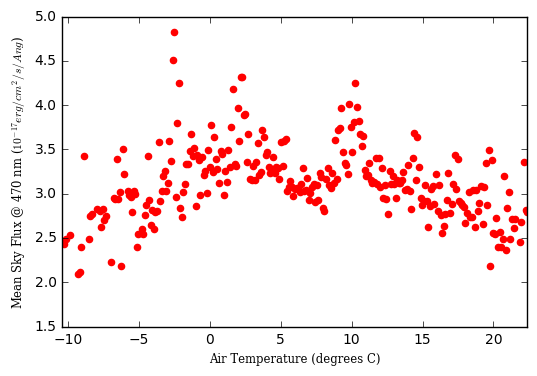

In [170]:
from astropy.time import Time, TimeDelta
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun, get_moon
from astropy import units as u 

APACHE = EarthLocation.of_site('Apache Point')

In [226]:
tt = Time(data['TAI-BEG']/86400., scale='tai', format='mjd', location=APACHE)

In [227]:
tt[100].fits

'2009-12-21T09:58:52.000(TAI)'

In [195]:
months = [t.month for t in tt.datetime]

In [201]:
hour_start = [t.hour for t in tt.datetime]

In [197]:
seasons = {1:1,2:1, 3:2,4:2,5:3,6:3,7:4,8:4,9:5,10:5,11:6,12:6}

In [198]:
SS = [seasons[month] for month in months]

/Users/parkerf/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


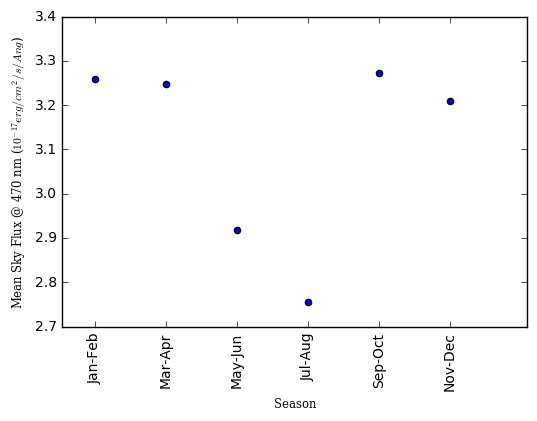

In [196]:
means, edges, numbers = stats.binned_statistic(months, data['SKY_VALUE'], statistic = 'mean', bins = 6)
plt.scatter(edges[1:], means)
labels = ('Jan-Feb','Mar-Apr','May-Jun', 'Jul-Aug','Sep-Oct','Nov-Dec')
plt.xticks(edges[1:], labels, rotation='vertical')

plt.xlabel("Season", fontproperties = font)
plt.ylabel("Mean Sky Flux @ 470 nm ($10^{-17} erg/cm^{2}/s/Ang$)", fontproperties = font)
#plt.title("Mean dark sky continuum (Red)", fontproperties = font)
plt.legend(loc = 'upper left', prop = font)